#  <ins>Verkehrsuntersuchung - Visualisierung</ins>

## Initialisierung

In [1]:
import numpy as np
import pandas as pd
from sqlalchemy import create_engine#, text, MetaData, Table, Column, String
import seaborn as sns
import matplotlib.pyplot as plt
import holidays

In [2]:
sql_password = '' # Benutze hier dein MySQL- Passwort
engine = create_engine('mysql+mysqlconnector://root:' + sql_password + '@localhost:3306/verkehrsprojekt')
connection = engine.connect()

## Datenuntersuchung

### PKW- Daten

#### Grafische Darstellung - PKW

In [8]:
# Für jedes Jahr: Aufsummierte Nutzung gruppiert nach Stunde des Tages
if True:
    dfs = []
    for year in range(2018, 2023 +1):
        query = f"""
        SELECT  
        	SUM(Durchschnitt)
        FROM 
        	pkw_daten
        WHERE 
        	YEAR(timestamp) = {year}
        GROUP BY
        	HOUR(timestamp)
        """
        df = pd.read_sql(query,engine)
        df = df.rename(columns = {'SUM(Durchschnitt)':'Anzahl PKW'})
        dfs.append(df)

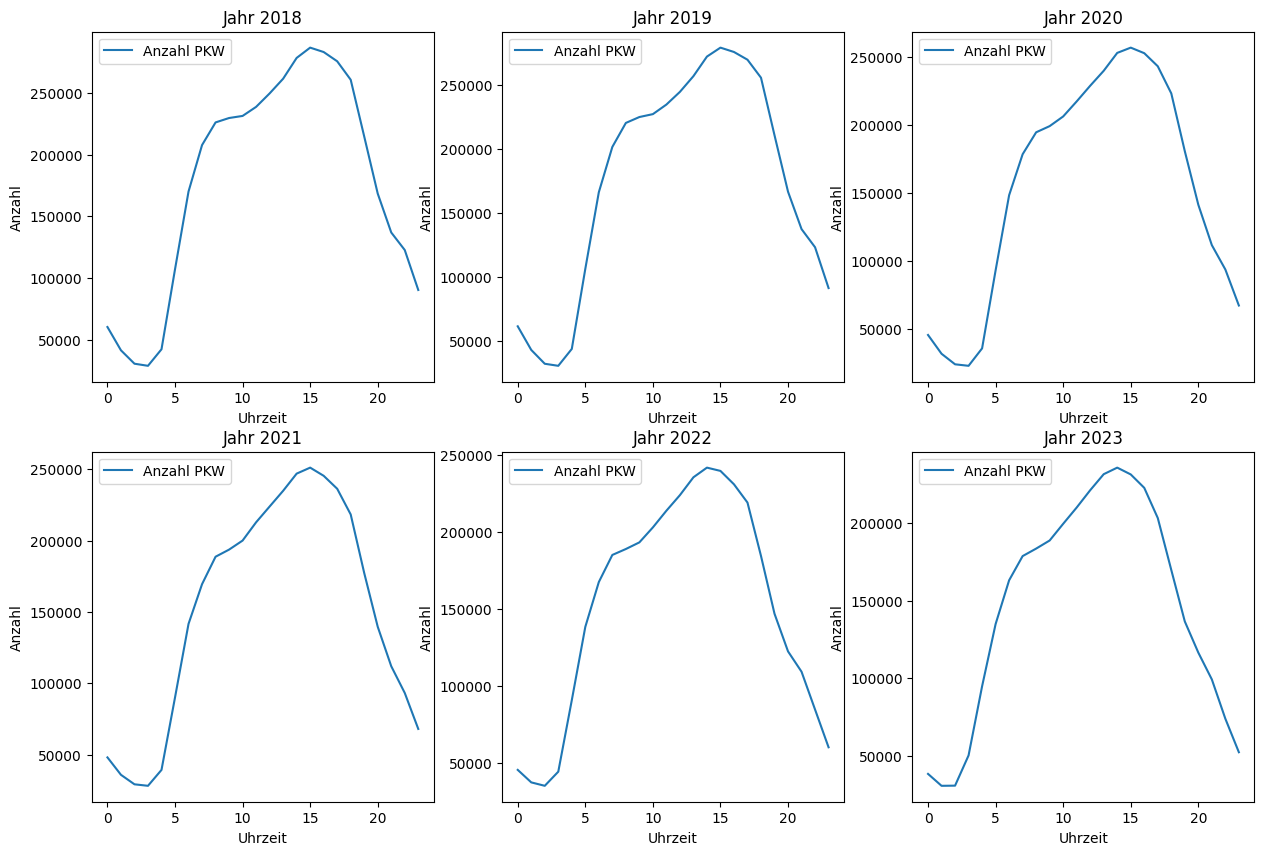

In [9]:
if True:
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    
    for i, ax in zip(range(6), axes.ravel()):
        sns.lineplot(data = dfs[i], ax = ax)
        ax.set_title(f'Jahr {i+2018}')
        ax.set_xlabel('Uhrzeit')
        ax.set_ylabel('Anzahl')
    
    plt.show()

In [10]:
# Für jedes Jahr: Aufsummierte Nutzung gruppiert nach Tag des Jahres
if True:
    dfs = []
    for year in range(2018, 2023 +1):
        query = f"""
        SELECT  
        	SUM(Durchschnitt)
        FROM 
        	pkw_daten
        WHERE 
        	YEAR(timestamp) = {year}
        GROUP BY
        	DAYOFYEAR(timestamp)
        """
        df = pd.read_sql(query,engine)
        df = df.rename(columns = {'SUM(Durchschnitt)':'Anzahl PKW'})
        dfs.append(df)

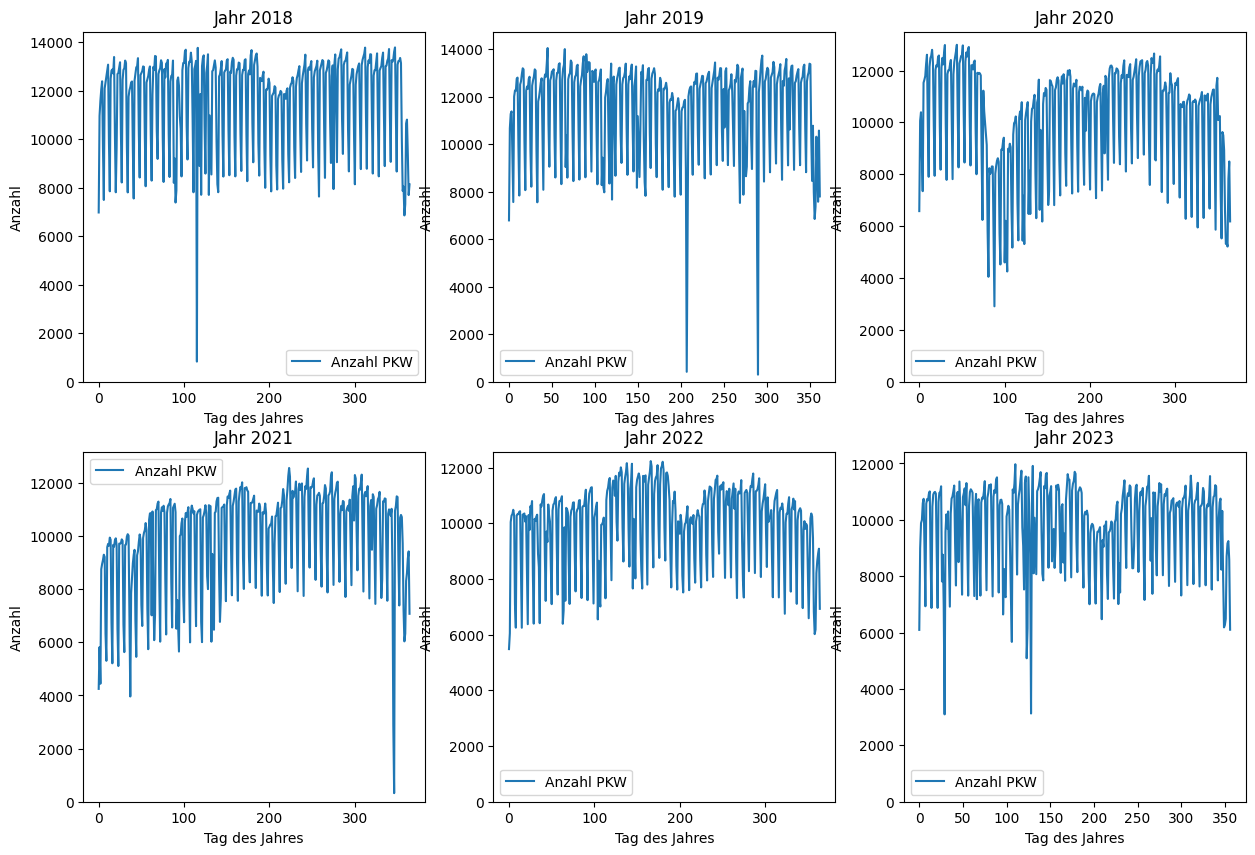

In [11]:
if True:
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    
    for i, ax in zip(range(6), axes.ravel()):
        sns.lineplot(data = dfs[i], ax = ax)
        ax.set_title(f'Jahr {i+2018}')
        ax.set_xlabel('Tag des Jahres')
        ax.set_ylabel('Anzahl')
        ax.set_ylim(0)
    
    plt.show()

In [12]:
# Für jedes Jahr: Aufsummierte Nutzung gruppiert nach Woche des Jahres
if True:
    dfs = []
    for year in range(2018, 2023 +1):
        query = f"""
        SELECT  
        	SUM(Durchschnitt)
        FROM 
        	pkw_daten
        WHERE 
        	YEAR(timestamp) = {year}
        GROUP BY
        	WEEKOFYEAR(timestamp)
        """
        df = pd.read_sql(query,engine)
        df = df.rename(columns = {'SUM(Durchschnitt)':'Anzahl PKW'})
        dfs.append(df)

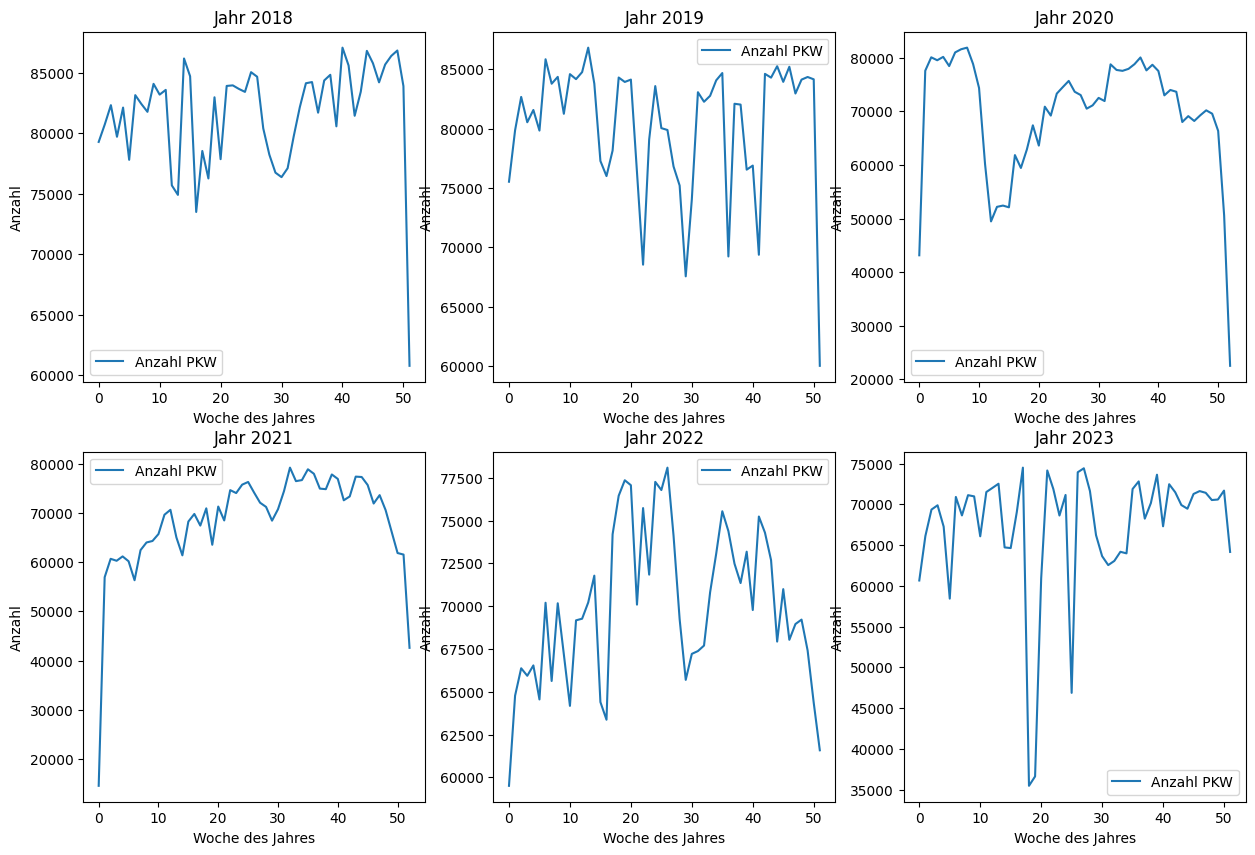

In [13]:
if True:
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    
    for i, ax in zip(range(6), axes.ravel()):
        sns.lineplot(data = dfs[i], ax = ax)
        ax.set_title(f'Jahr {i+2018}')
        ax.set_xlabel('Woche des Jahres')
        ax.set_ylabel('Anzahl')
    
    plt.show()

In [14]:
# Aufsummierte Nutzung gruppiert nach Woche des Jahres, für alle 6 Jahre zusammen
if True:
    for year in range(2018, 2023 +1):
        query = f"""
        SELECT  
        	SUM(Durchschnitt)
        FROM 
        	pkw_daten
        GROUP BY
        	WEEKOFYEAR(timestamp)
        """
        df = pd.read_sql(query,engine)
        df = df.rename(columns = {'SUM(Durchschnitt)':'Anzahl PKW'})

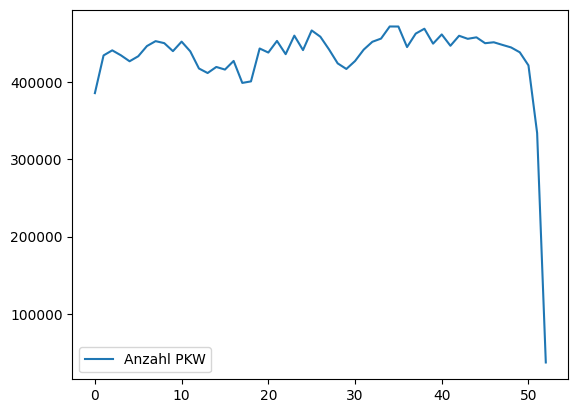

In [15]:
if True: # Es fehlt noch Achsenbeschriftung
    sns.lineplot(data = df)

In [16]:
# Für jedes Jahr: Aufsummierte Nutzung gruppiert nach Wochentag
if True:
    dfs = []
    for year in range(2018, 2023 +1):
        query = f"""
        SELECT  
        	SUM(Durchschnitt)
        FROM 
        	pkw_daten
        WHERE 
        	YEAR(timestamp) = {year}
        GROUP BY
        	WEEKDAY(timestamp)
        """
        df = pd.read_sql(query,engine)
        df = df.rename(columns = {'SUM(Durchschnitt)':'Anzahl PKW'})
        df.index = ['Mo', 'Di', 'Mi', 'Do', 'Fr', 'Sa', 'So']
        dfs.append(df)

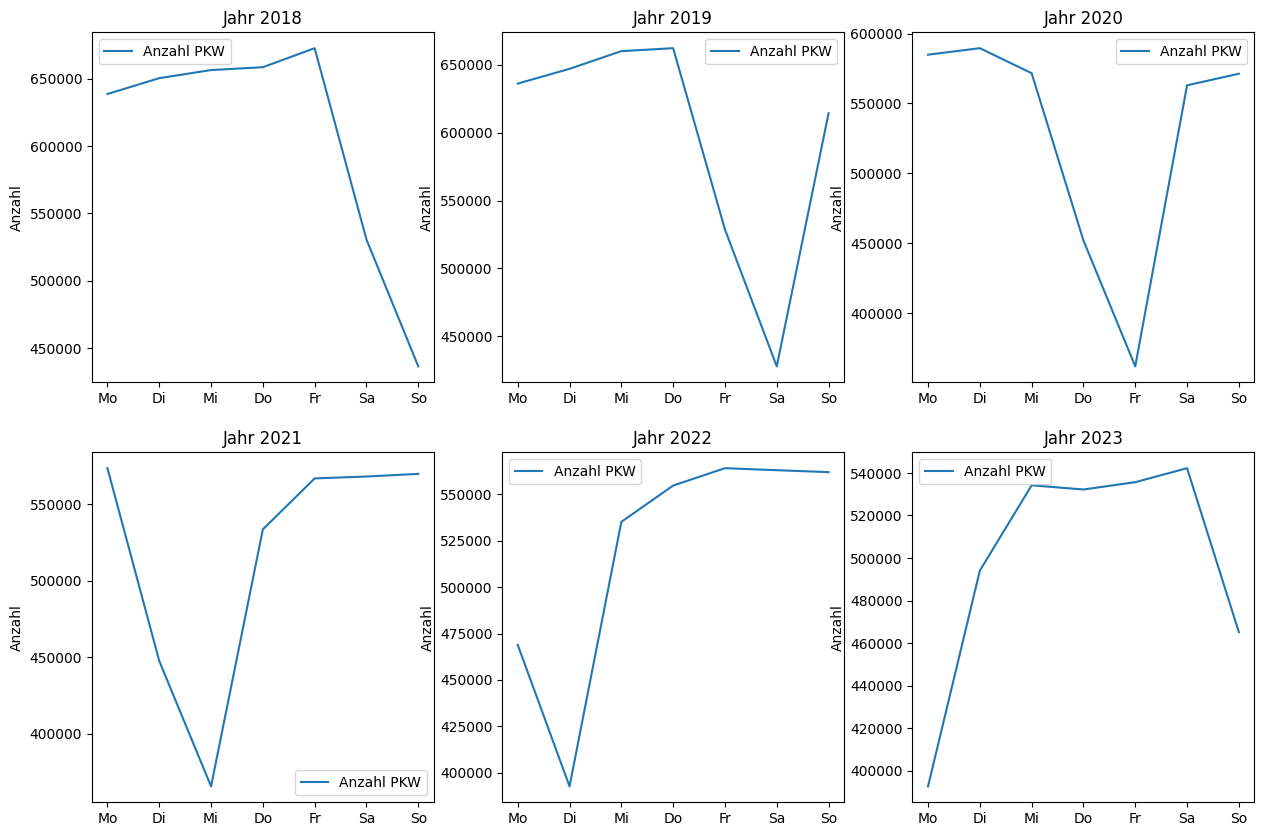

In [17]:
if True:
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    
    for i, ax in zip(range(6), axes.ravel()):
        sns.lineplot(data = dfs[i], ax = ax)
        ax.set_title(f'Jahr {i+2018}')
        #ax.set_xlabel('Tag der Woche')
        ax.set_ylabel('Anzahl')
    
    plt.show()

In [18]:
# Aufsummierte Nutzung gruppiert nach Wochentag, für alle 6 Jahre zusammen
if True:
    for year in range(2018, 2023 +1):
        query = f"""
        SELECT  
        	SUM(Durchschnitt)
        FROM 
        	pkw_daten
        GROUP BY
        	WEEKDAY(timestamp)
        """
        df = pd.read_sql(query,engine)
        df = df.rename(columns = {'SUM(Durchschnitt)':'Anzahl PKW'})
        df.index = ['Mo', 'Di', 'Mi', 'Do', 'Fr', 'Sa', 'So']

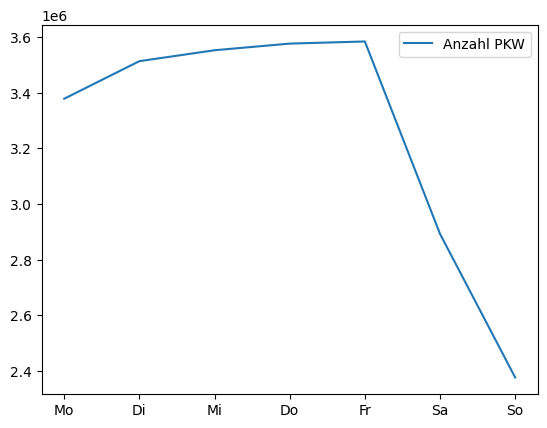

In [19]:
if True:
    sns.lineplot(data = df)

In [20]:
# Aufsummierte Nutzung gruppiert nach Wochentag, für alle 6 Jahre zusammen
if True:
    for year in range(2018, 2023 +1):
        query = f"""
        SELECT  
        	SUM(Durchschnitt)
        FROM 
        	pkw_daten
        GROUP BY
        	YEAR(timestamp)
        """
        df = pd.read_sql(query,engine)
        df = df.rename(columns = {'SUM(Durchschnitt)':'Anzahl PKW'})
        df.index = df.index +2018

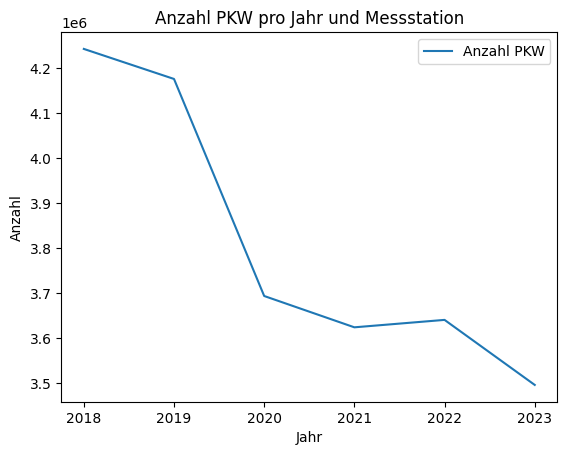

In [21]:
if True:
    plt.plot(figsize=(8, 6))
    sns.lineplot(data = df).set(title='Anzahl PKW pro Jahr und Messstation', xlabel='Jahr', ylabel='Anzahl')

### Fahrrad- Daten 

#### Grafische Darstellung - Fahrrad

In [22]:
# Für jedes Jahr: Aufsummierte Nutzung gruppiert nach Stunde des Tages
if True:
    dfs = []
    for year in range(2018, 2023 +1):
        query = f"""
        SELECT  
        	SUM(Durchschnitt)
        FROM 
        	fahrraddaten
        WHERE 
        	YEAR(timestamp) = {year}
        GROUP BY
        	HOUR(timestamp)
        """
        df = pd.read_sql(query,engine)
        df = df.rename(columns = {'SUM(Durchschnitt)':'Anzahl Fahrräder'})
        dfs.append(df)

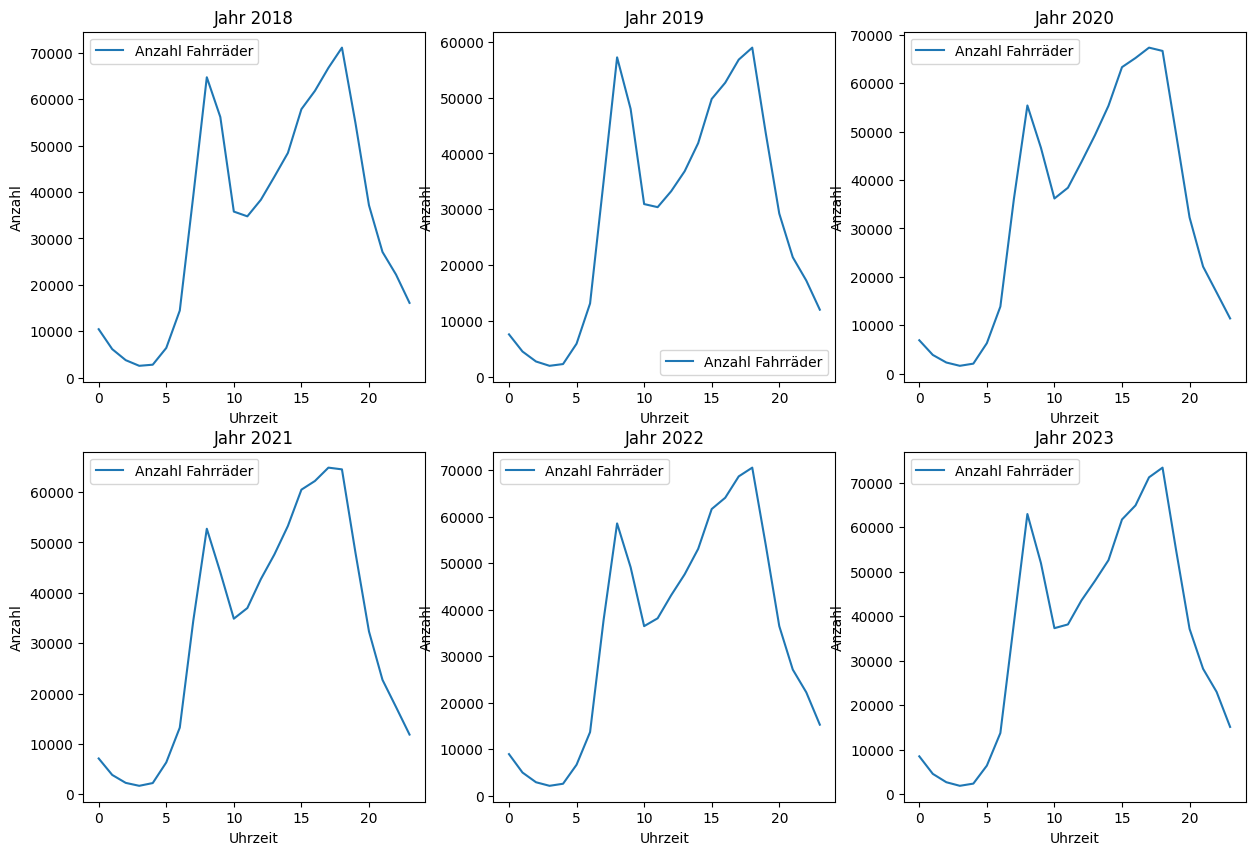

In [23]:
if True:
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    
    for i, ax in zip(range(6), axes.ravel()):
        sns.lineplot(data = dfs[i], ax = ax)
        ax.set_title(f'Jahr {i+2018}')
        ax.set_xlabel('Uhrzeit')
        ax.set_ylabel('Anzahl')
    
    plt.show()

In [24]:
# Für jedes Jahr: Aufsummierte Nutzung gruppiert nach Tag des Jahres
if True:
    dfs = []
    for year in range(2018, 2023 +1):
        query = f"""
        SELECT  
        	SUM(Durchschnitt)
        FROM 
        	fahrraddaten
        WHERE 
        	YEAR(timestamp) = {year}
        GROUP BY
        	DAYOFYEAR(timestamp)
        """
        df = pd.read_sql(query,engine)
        df = df.rename(columns = {'SUM(Durchschnitt)':'Anzahl PKW'})
        dfs.append(df)

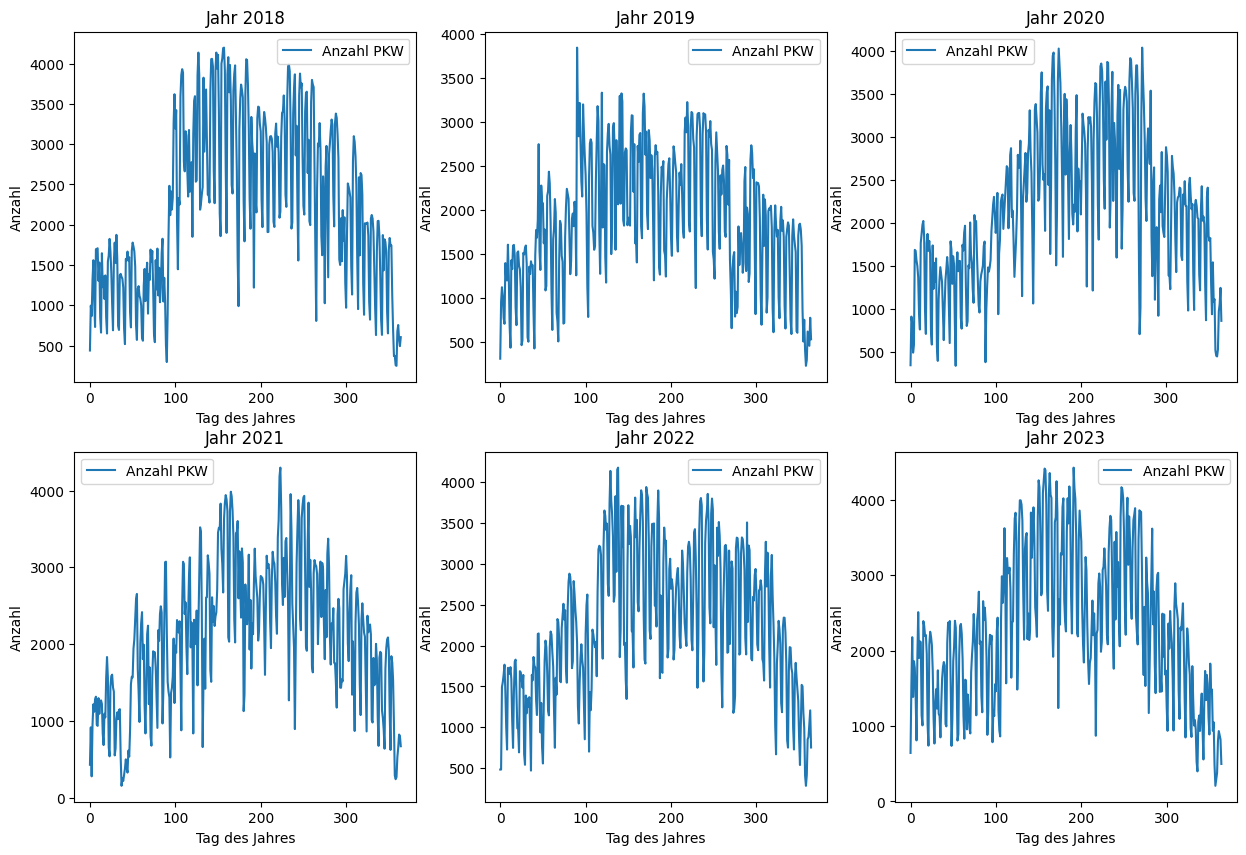

In [25]:
if True:
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    
    for i, ax in zip(range(6), axes.ravel()):
        sns.lineplot(data = dfs[i], ax = ax)
        ax.set_title(f'Jahr {i+2018}')
        ax.set_xlabel('Tag des Jahres')
        ax.set_ylabel('Anzahl')
    
    plt.show()

In [26]:
# Für jedes Jahr: Aufsummierte Nutzung gruppiert nach Woche des Jahres
if True:
    dfs = []
    for year in range(2018, 2023 +1):
        query = f"""
        SELECT  
        	SUM(Durchschnitt)
        FROM 
        	fahrraddaten
        WHERE 
        	YEAR(timestamp) = {year}
        GROUP BY
        	WEEKOFYEAR(timestamp)
        """
        df = pd.read_sql(query,engine)
        df = df.rename(columns = {'SUM(Durchschnitt)':'Anzahl PKW'})
        dfs.append(df)

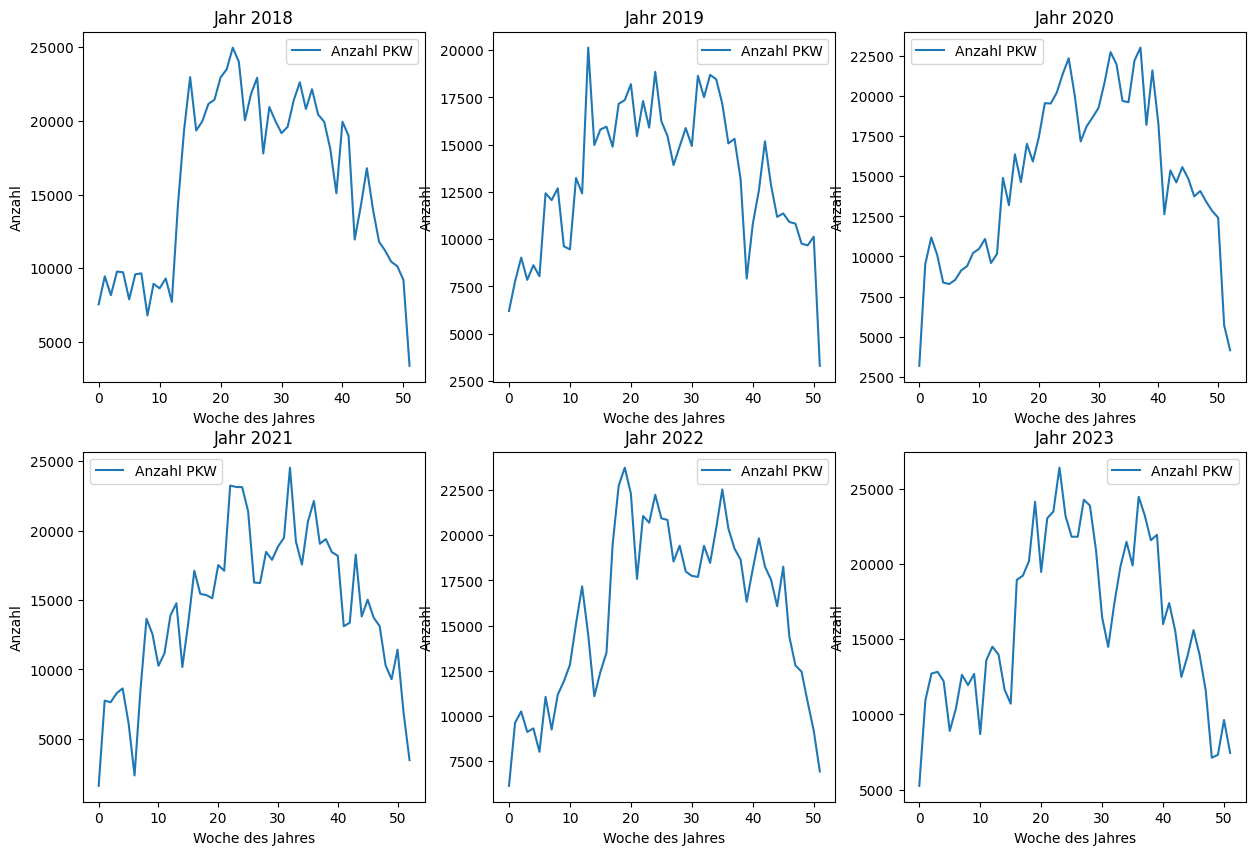

In [27]:
if True:
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    
    for i, ax in zip(range(6), axes.ravel()):
        sns.lineplot(data = dfs[i], ax = ax)
        ax.set_title(f'Jahr {i+2018}')
        ax.set_xlabel('Woche des Jahres')
        ax.set_ylabel('Anzahl')
    
    plt.show()

In [28]:
# Aufsummierte Nutzung gruppiert nach Woche des Jahres, für alle 6 Jahre zusammen
if True:
    for year in range(2018, 2023 +1):
        query = f"""
        SELECT  
        	SUM(Durchschnitt)
        FROM 
        	fahrraddaten
        GROUP BY
        	WEEKOFYEAR(timestamp)
        """
        df = pd.read_sql(query,engine)
        df = df.rename(columns = {'SUM(Durchschnitt)':'Anzahl Fahrräder'})

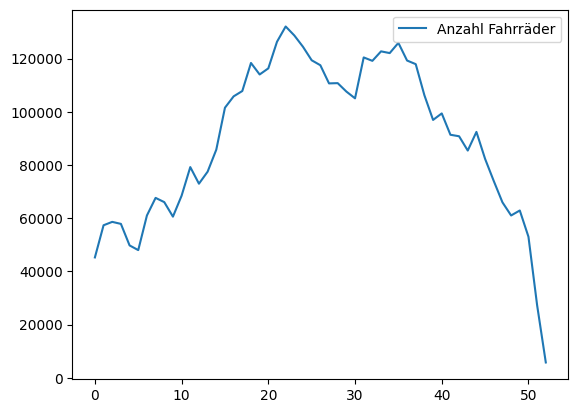

In [29]:
if True: # Es fehlt noch Achsenbeschriftung
    sns.lineplot(data = df)

In [30]:
# Für jedes Jahr: Aufsummierte Nutzung gruppiert nach Wochentag
if True:
    dfs = []
    for year in range(2018, 2023 +1):
        query = f"""
        SELECT  
        	SUM(Durchschnitt)
        FROM 
        	fahrraddaten
        WHERE 
        	YEAR(timestamp) = {year}
        GROUP BY
        	WEEKDAY(timestamp)
        """
        df = pd.read_sql(query,engine)
        df = df.rename(columns = {'SUM(Durchschnitt)':'Anzahl PKW'})
        df.index = ['Mo', 'Di', 'Mi', 'Do', 'Fr', 'Sa', 'So']
        dfs.append(df)

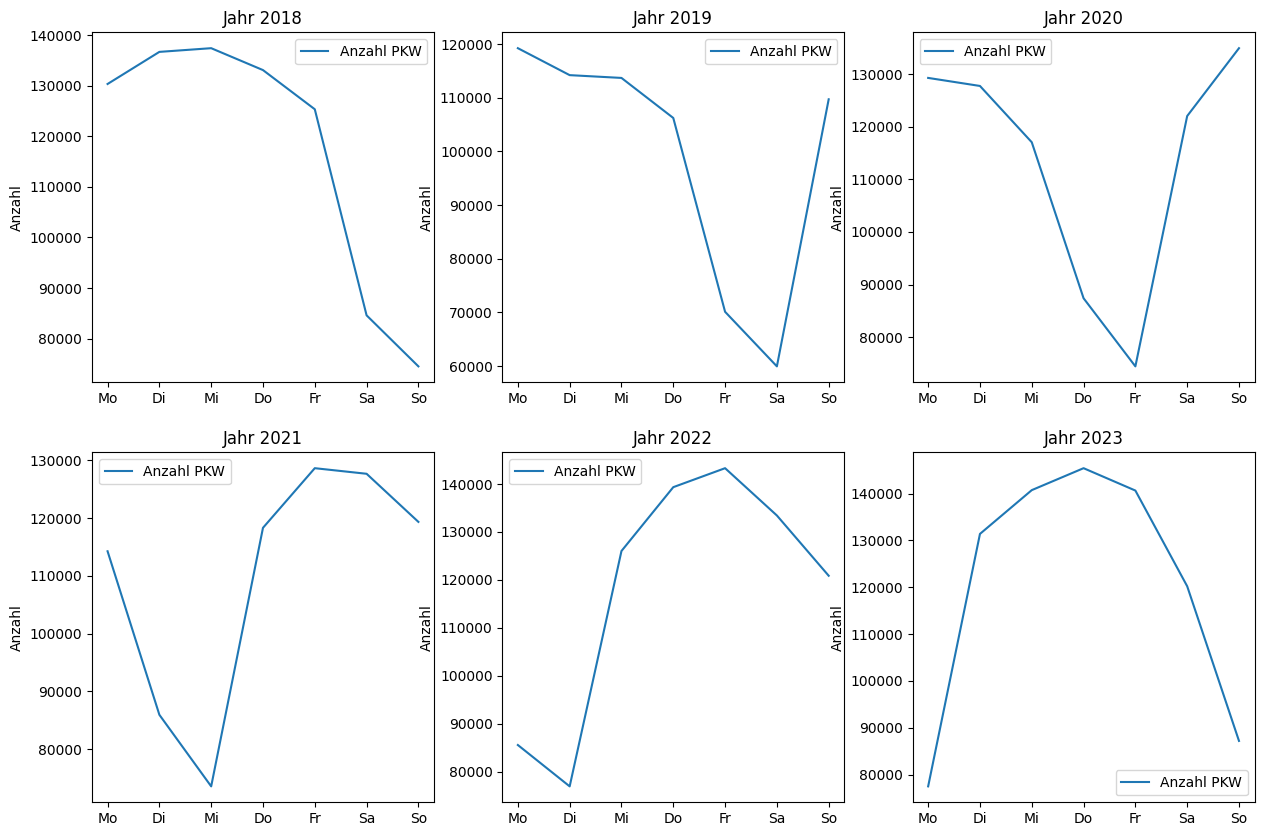

In [31]:
if True:
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    
    for i, ax in zip(range(6), axes.ravel()):
        sns.lineplot(data = dfs[i], ax = ax)
        ax.set_title(f'Jahr {i+2018}')
        #ax.set_xlabel('Tag der Woche')
        ax.set_ylabel('Anzahl')
    
    plt.show()

In [32]:
# Aufsummierte Nutzung gruppiert nach Wochentag, für alle 6 Jahre zusammen
if True:
    for year in range(2018, 2023 +1):
        query = f"""
        SELECT  
        	SUM(Durchschnitt)
        FROM 
        	fahrraddaten
        GROUP BY
        	WEEKDAY(timestamp)
        """
        df = pd.read_sql(query,engine)
        df = df.rename(columns = {'SUM(Durchschnitt)':'Anzahl Fahrräder'})
        df.index = ['Mo', 'Di', 'Mi', 'Do', 'Fr', 'Sa', 'So']

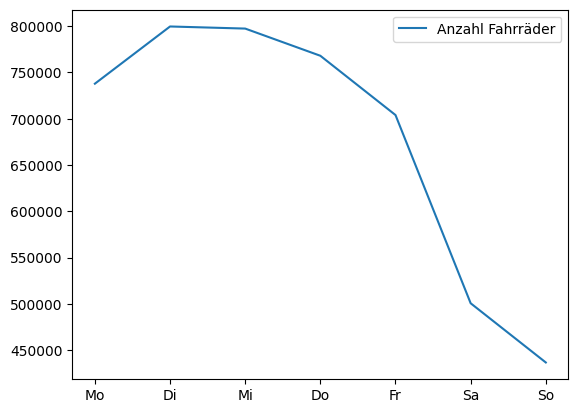

In [33]:
if True:
    sns.lineplot(data = df)

In [34]:
# Aufsummierte Nutzung gruppiert nach Wochentag, für alle 6 Jahre zusammen
if True:
    for year in range(2018, 2023 +1):
        query = f"""
        SELECT  
        	SUM(Durchschnitt)
        FROM 
        	fahrraddaten
        GROUP BY
        	YEAR(timestamp)
        """
        df = pd.read_sql(query,engine)
        df = df.rename(columns = {'SUM(Durchschnitt)':'Anzahl Fahrräder'})
        df.index = df.index +2018

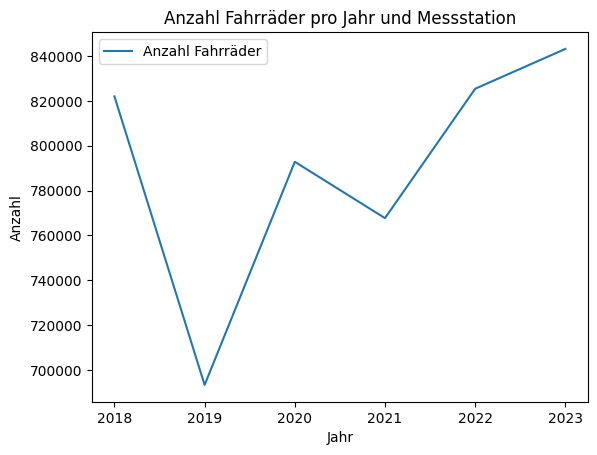

In [35]:
if True:
    plt.plot(figsize=(8, 6))
    sns.lineplot(data = df).set(title='Anzahl Fahrräder pro Jahr und Messstation', xlabel='Jahr', ylabel='Anzahl')

## Visualisierung Auto/Fahrrad Mit den bisherigen Fahrrad- Daten

In [36]:
# pkw- Spalte

query = f"""
SELECT  
    timestamp, Durchschnitt
FROM 
    pkw_daten
"""
df = pd.read_sql(query,engine)
df = df.rename(columns = {'Durchschnitt':'Anzahl PKW'})
df  = df.set_index('timestamp')
pkw_spalte = df

In [37]:
# Fahrrad- Spalte

query = f"""
SELECT  
    timestamp, Durchschnitt
FROM 
    fahrraddaten
"""
df = pd.read_sql(query,engine)
df = df.rename(columns = {'Durchschnitt':'Anzahl Fahrräder'})
df  = df.set_index('timestamp')
fahrrad_spalte = df

In [38]:
# Dataframe für Machine learning erstellen

df = pd.read_csv('Wetterdaten_Bezirke_Durchschnitt.csv', decimal = '.' )
df['time'] = pd.to_datetime(df['time'])
df['precipitation (mm)'] = df['rain (mm)'] + 10*df['snowfall (cm)']
df = df.drop(columns = ['rain (mm)', 'snowfall (cm)'])
df['dayofweek'] = df['time'].dt.dayofweek
df['month'] = df['time'].dt.month
df['hour'] = df['time'].dt.hour 
berlin_holidays = holidays.Germany(state = 'BE')
df['is_holiday'] = df['time'].apply(lambda x: berlin_holidays.get(x, None))
df['is_holiday'] = df['is_holiday'].apply(lambda x: 1 if isinstance(x, str) else 0) # Es ist komisch, dass ich das in zwei Schritten machen muss. Aber die isin- methode hat komische Ergebnisse produziert
#df['is_holiday'] = ((df['is_holiday'] == 1) | (df['dayofweek'] == 6)).astype(int) # Auch Sonntage sollen als Holiday gewertet werden
df = df.rename(columns = {'time':'timestamp'})
df = df.set_index('timestamp')
df = pd.concat([df,pkw_spalte,fahrrad_spalte], axis = 1)

In [39]:
# NaN filtern
df = df[~df['Anzahl PKW'].isna()]
df = df[~df['Anzahl Fahrräder'].isna()]

In [40]:
# Aureißer ausschließen
problem_tage = [
'2018-04-25',
'2019-07-28',
'2019-10-20',
'2021-12-13',
'2023-01-30',
'2023-05-15',
]
problem_tage = pd.to_datetime(problem_tage)
filt = df.index.normalize().isin(problem_tage)
df = df[~filt]

In [41]:
df_unscaled = df.copy()

In [42]:
day_names = ['Mo', 'Di', 'Mi', 'Do', 'Fr', 'Sa', 'So']

In [43]:
df_unscaled['dayofweek'] = df_unscaled['dayofweek'].apply(lambda n: day_names[n])

In [44]:
df_dayofweek = df_unscaled[['hour', 'dayofweek', 'Anzahl PKW', 'Anzahl Fahrräder']]

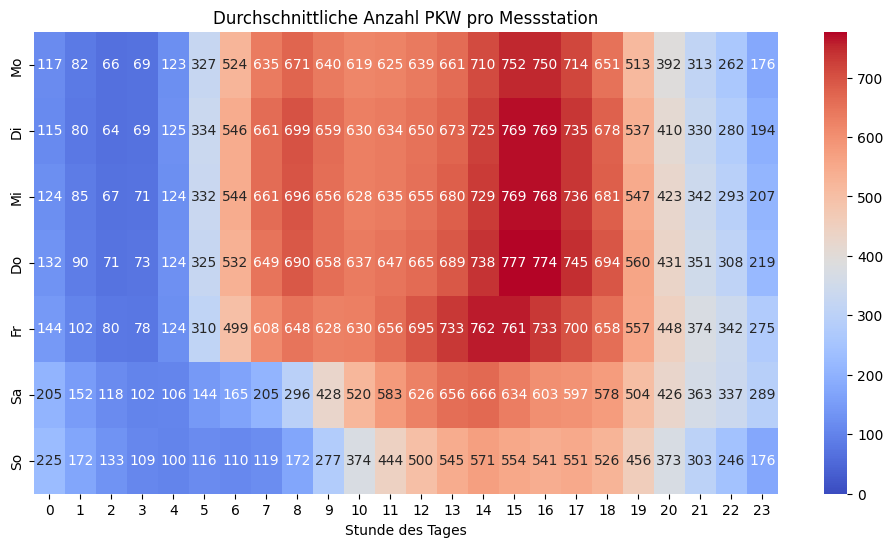

In [45]:
# Pivot table: rows = day, columns = hour, values = mean users
pivot = df_dayofweek.pivot_table(values='Anzahl PKW', index='dayofweek', columns='hour', aggfunc='mean')
pivot = pivot.reindex(day_names) #Aus irgend einem Grund wurden die Tagesnamen verdreht

plt.figure(figsize=(12, 6))
sns.heatmap(pivot, cmap='coolwarm', annot=True, fmt=".0f", vmin = 0)
plt.title('Durchschnittliche Anzahl PKW pro Messstation')
plt.xlabel('Stunde des Tages')
plt.ylabel('')
plt.show()

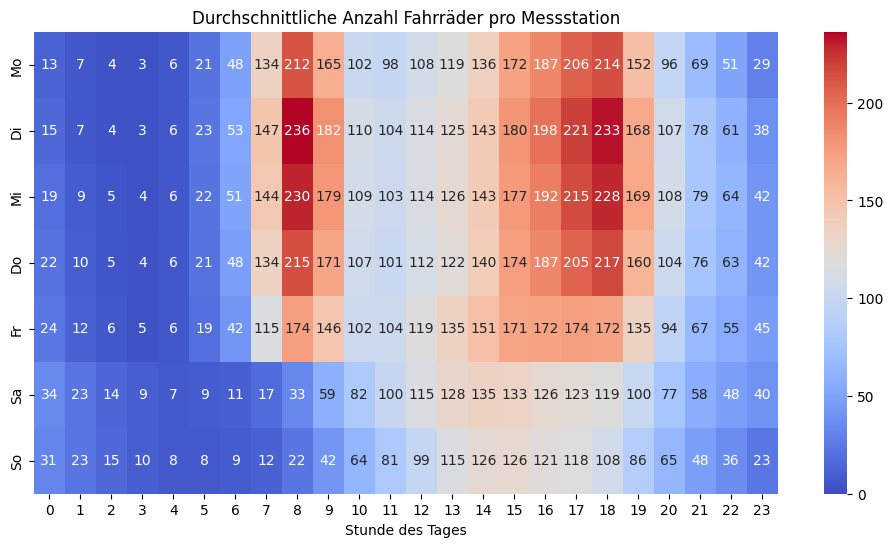

In [46]:
# Pivot table: rows = day, columns = hour, values = mean users
pivot = df_dayofweek.pivot_table(values='Anzahl Fahrräder', index='dayofweek', columns='hour', aggfunc='mean')
pivot = pivot.reindex(day_names) #Aus irgend einem Grund wurden die Tagesnamen verdreht

plt.figure(figsize=(12, 6))
sns.heatmap(pivot, cmap='coolwarm', annot=True, fmt=".0f", vmin = 0)
plt.title('Durchschnittliche Anzahl Fahrräder pro Messstation')
plt.xlabel('Stunde des Tages')
plt.ylabel('')
plt.show()

In [47]:
df_yearly = df_unscaled[['Anzahl PKW', 'Anzahl Fahrräder']]
df_yearly['year'] = df_yearly.index.year
df_yearly['quarter'] = (df_yearly.index.month-1)//3 +1
df_yearly = df_yearly.groupby(['year', 'quarter']).sum()
df_yearly = df_yearly.reset_index()
df_yearly.index = df_yearly['year'].astype(str) + ' Q_' + df_yearly['quarter'].astype(str)
df_yearly = df_yearly.drop(columns = ['year','quarter'])

C:\Users\Efi\AppData\Local\Temp\ipykernel_2684\547487843.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_yearly['year'] = df_yearly.index.year
C:\Users\Efi\AppData\Local\Temp\ipykernel_2684\547487843.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_yearly['quarter'] = (df_yearly.index.month-1)//3 +1


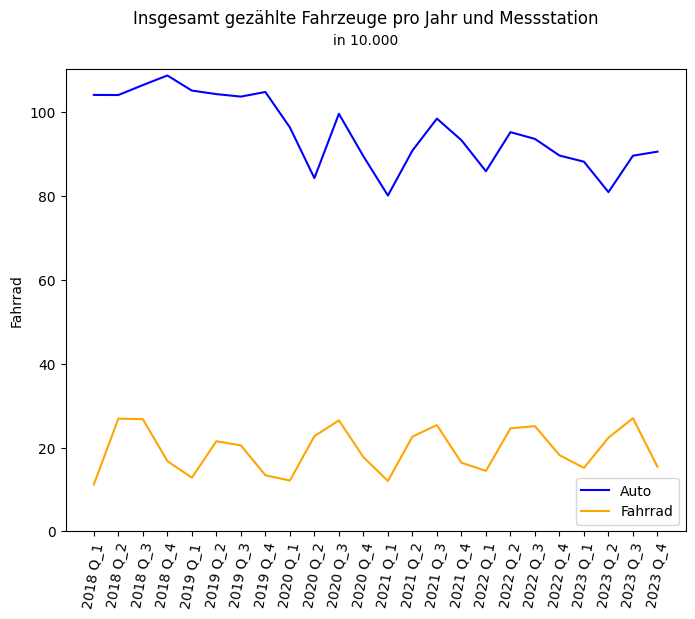

In [48]:
# Plot erstellen
fig, ax1 = plt.subplots(figsize=(8, 6))

# Erste y-Achse (für Auto)
ax1.plot(df_yearly.index, df_yearly['Anzahl PKW']/10000, color='blue', label='Auto')
#ax1.set_xlabel('Jahr')
ax1.set_ylabel('Auto')
ax1.tick_params(axis='y')
ax1.set_ylim(0)

# Zweite y-Achse (für Fahrrad)
ax2 = ax1#.twinx()
ax2.plot(df_yearly.index, df_yearly['Anzahl Fahrräder']/10000, color='orange', label='Fahrrad')
ax2.set_ylabel('Fahrrad')
ax2.tick_params(axis='y')
ax2.set_ylim(0)

# Titel und Legenden hinzufügen
fig.suptitle('Insgesamt gezählte Fahrzeuge pro Jahr und Messstation')
#fig.subtitle('in 10.000')
ax1.legend(loc='lower left')
ax2.legend(loc='lower right')

fig.text(0.5, 1-0.078, "in 10.000", ha='center', fontsize=10)  # Untertitel
plt.xticks(rotation=80)
plt.show()

In [49]:
df_weekofyear = df_unscaled[['Anzahl PKW', 'Anzahl Fahrräder']]

In [50]:
df_weekofyear['weekofyear'] = df_weekofyear.index.isocalendar().week

C:\Users\Efi\AppData\Local\Temp\ipykernel_2684\8236524.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_weekofyear['weekofyear'] = df_weekofyear.index.isocalendar().week


In [51]:
df_weekofyear = df_weekofyear.groupby('weekofyear').mean()

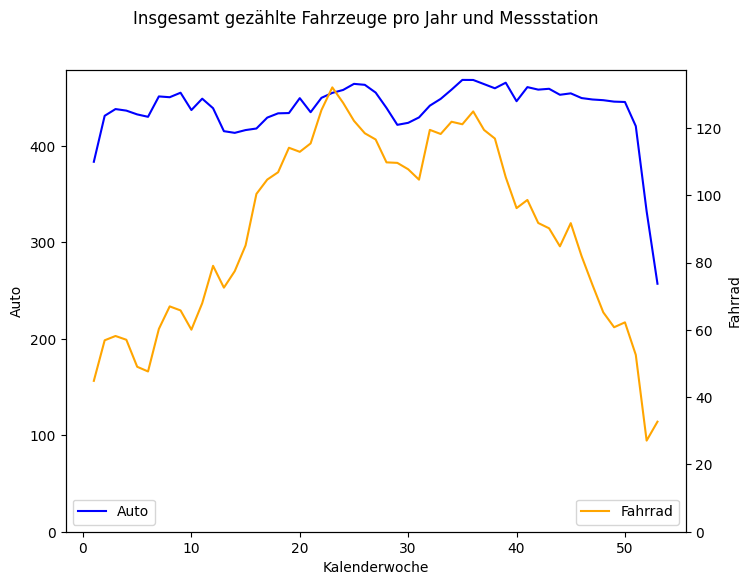

In [52]:
# Plot erstellen
fig, ax1 = plt.subplots(figsize=(8, 6))

# Erste y-Achse (für Auto)
ax1.plot(df_weekofyear.index, df_weekofyear['Anzahl PKW'], color='blue', label='Auto')
ax1.set_xlabel('Kalenderwoche')
ax1.set_ylabel('Auto')
ax1.tick_params(axis='y')
ax1.set_ylim(0)

# Zweite y-Achse (für Fahrrad)
ax2 = ax1.twinx()
ax2.plot(df_weekofyear.index, df_weekofyear['Anzahl Fahrräder'], color='orange', label='Fahrrad')
ax2.set_ylabel('Fahrrad')
ax2.tick_params(axis='y')
ax2.set_ylim(0)

# Titel und Legenden hinzufügen
fig.suptitle('Insgesamt gezählte Fahrzeuge pro Jahr und Messstation')
ax1.legend(loc='lower left')
ax2.legend(loc='lower right')

plt.show()

In [53]:
df_holiday = df_unscaled[['Anzahl PKW', 'Anzahl Fahrräder', 'dayofweek', 'hour', 'is_holiday']]

In [54]:
df_holiday['is_holiday'] = (df_holiday['is_holiday'] == 1) | (df_holiday['dayofweek'] == 'So')
df_holiday['is_holiday'] = df_holiday['is_holiday'].astype(int)

C:\Users\Efi\AppData\Local\Temp\ipykernel_2684\2107973249.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_holiday['is_holiday'] = (df_holiday['is_holiday'] == 1) | (df_holiday['dayofweek'] == 'So')
C:\Users\Efi\AppData\Local\Temp\ipykernel_2684\2107973249.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_holiday['is_holiday'] = df_holiday['is_holiday'].astype(int)


In [55]:
Tageszeitkategorie = [ 'nachts', # 0
                      'nachts', # 1
                      'nachts', # 2
                      'nachts', # 3
                      'nachts', # 4
                      'nachts', # 5
                      'morgens', # 6
                      'morgens', # 7
                      'morgens', # 8
                      'vormittags', # 9
                      'vormittags', # 10
                      'mittags', # 11
                      'mittags', # 12
                      'mittags', # 13
                      'nachmittags', # 14
                      'nachmittags', # 15
                      'nachmittags', # 16
                      'nachmittags', # 17
                      'abends', # 18
                      'abends', # 19
                      'abends', # 20
                      'abends', # 21
                      'nachts', # 22
                      'nachts', # 23
                     ]

In [56]:
df_holiday['Tagesabschnitt'] = df_holiday['hour'].apply(lambda n: Tageszeitkategorie[n])

C:\Users\Efi\AppData\Local\Temp\ipykernel_2684\1521560.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_holiday['Tagesabschnitt'] = df_holiday['hour'].apply(lambda n: Tageszeitkategorie[n])


In [57]:
df_holiday['is_holiday'] = df_holiday['is_holiday'].apply(lambda n: 'ja' if n== 1 else 'nein')

C:\Users\Efi\AppData\Local\Temp\ipykernel_2684\592322408.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_holiday['is_holiday'] = df_holiday['is_holiday'].apply(lambda n: 'ja' if n== 1 else 'nein')


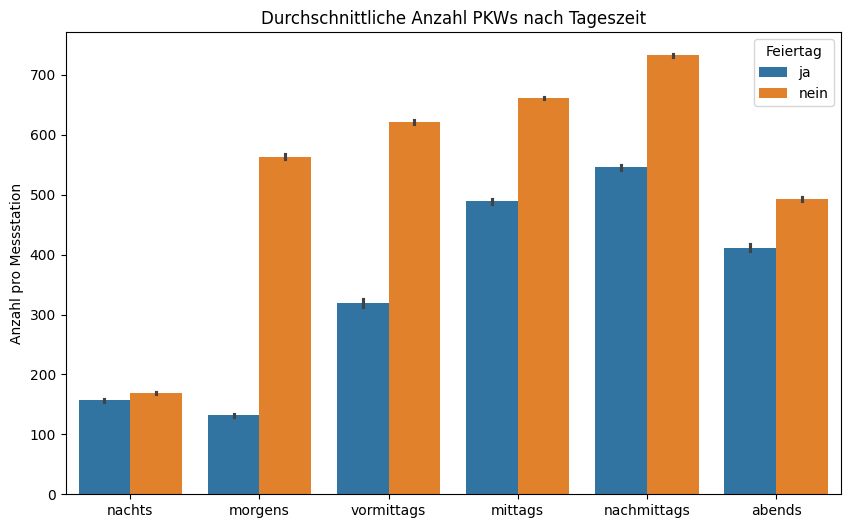

In [58]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Tagesabschnitt', y='Anzahl PKW', hue='is_holiday', data=df_holiday)
plt.title('Durchschnittliche Anzahl PKWs nach Tageszeit')
plt.xlabel('')
plt.ylabel('Anzahl pro Messstation')
plt.legend(title='Feiertag')
plt.show()

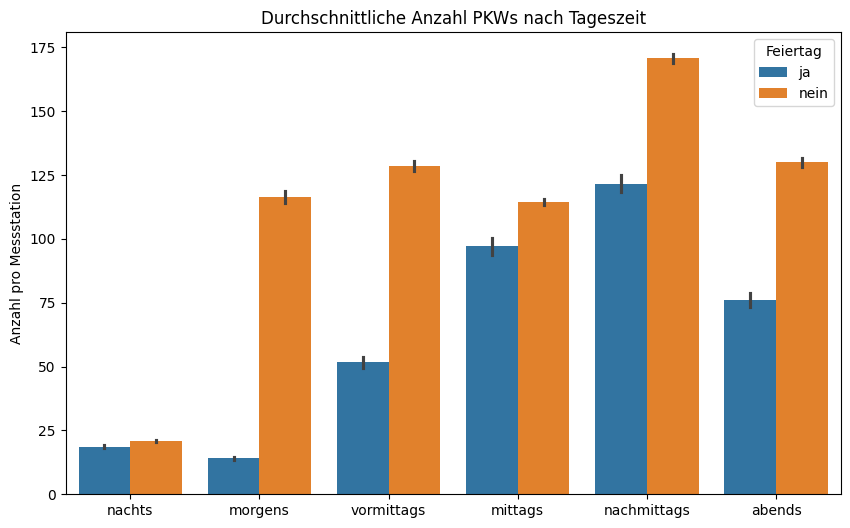

In [59]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Tagesabschnitt', y='Anzahl Fahrräder', hue='is_holiday', data=df_holiday)
plt.title('Durchschnittliche Anzahl PKWs nach Tageszeit')
plt.xlabel('')
plt.ylabel('Anzahl pro Messstation')
plt.legend(title='Feiertag')
plt.show()

## ML- Ergebnis

In [3]:
result_list_PKW = [['LinReg', 'Wetter', '0.17712963813833627'],
 ['LinReg', 'Zeit', '0.8333641734108016'],
 ['LinReg', 'Wetter + Zeit', '0.8333390893429679'],
 ['GradientBoost', 'Wetter', '0.1824541112733551'],
 ['GradientBoost', 'Zeit', '0.8335998911665494'],
 ['GradientBoost', 'Wetter + Zeit', '0.839114160245572'],
 ['RandomForest', 'Wetter', '0.2137522608953738'],
 ['RandomForest', 'Zeit', '0.7733936503089758'],
 ['RandomForest', 'Wetter + Zeit', '0.7446358574112648'],
 ['SVR', 'Wetter', '0.15586001582125975'],
 ['SVR', 'Zeit', '0.9194284273728988'],
 ['SVR', 'Wetter + Zeit', '0.8228630340741558']]

In [4]:
result_list_Fahrrad = [['LinReg', 'Wetter', '0.3490801842943796'],
 ['LinReg', 'Zeit', '0.7179510507779456'],
 ['LinReg', 'Wetter + Zeit', '0.7547847009021678'],
 ['GradientBoost', 'Wetter', '0.3457952417403657'],
 ['GradientBoost', 'Zeit', '0.7210257392024996'],
 ['GradientBoost', 'Wetter + Zeit', '0.7588112334281778'],
 ['RandomForest', 'Wetter', '0.37720034941164104'],
 ['RandomForest', 'Zeit', '0.6207188591505282'],
 ['RandomForest', 'Wetter + Zeit', '0.7547882619248895'],
 ['SVR', 'Wetter', '0.3516180674280356'],
 ['SVR', 'Zeit', '0.8515032872259345'],
 ['SVR', 'Wetter + Zeit', '0.7079776072864779']]

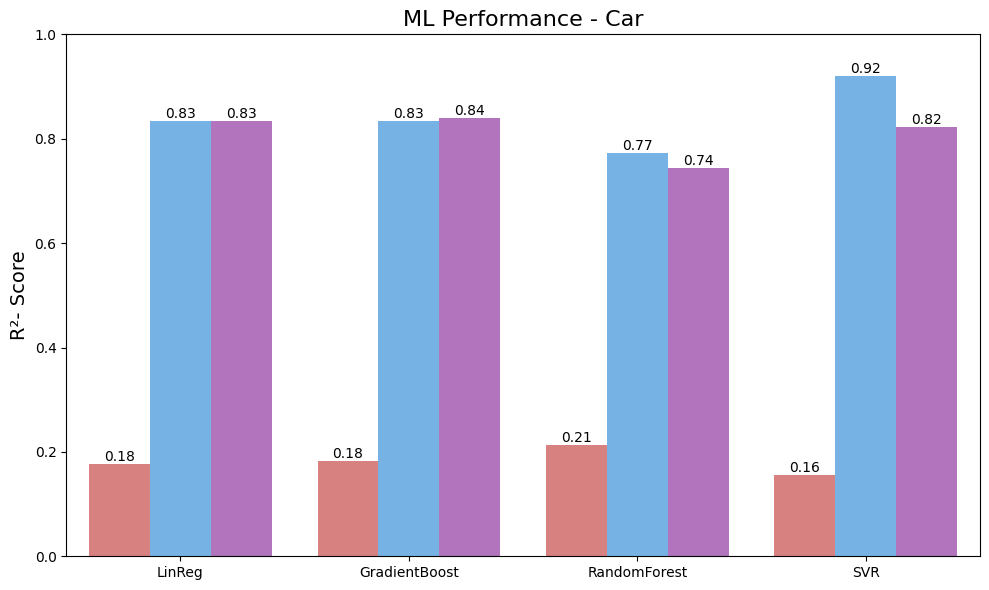

In [5]:
data = {
    'Algorithmus': ['LinReg', 'LinReg', 'LinReg',
                    'GradientBoost', 'GradientBoost', 'GradientBoost',
                    'RandomForest', 'RandomForest', 'RandomForest',
                    'SVR', 'SVR', 'SVR'],
    'Labels': ['Wetter', 'Zeit', 'Wetter + Zeit'] * 4,
    'r2_score': [float(el[2]) for el in result_list_PKW]
}

# DataFrame erstellen
df = pd.DataFrame(data)

custom_palette = {
    'Wetter': '#E57373',         # Muted Red
    'Zeit': '#64B5F6',           # Muted Blue
    'Wetter + Zeit': '#BA68C8'   # Muted Violet
}

# Barplot erstellen
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df, x='Algorithmus', y='r2_score', hue='Labels', palette=custom_palette)

# Titel und Labels
plt.title('ML Performance - Car', fontsize=16)
plt.xlabel('', fontsize=14)
plt.ylabel('R²- Score', fontsize=14)
plt.legend(title='Labels', fontsize=12)
ax.legend_.remove()
plt.tight_layout()
plt.ylim(0, 1)

for container in ax.containers:
    ax.bar_label(container, labels=[f"{v.get_height():.2f}" for v in container])

# Plot anzeigen
plt.show()

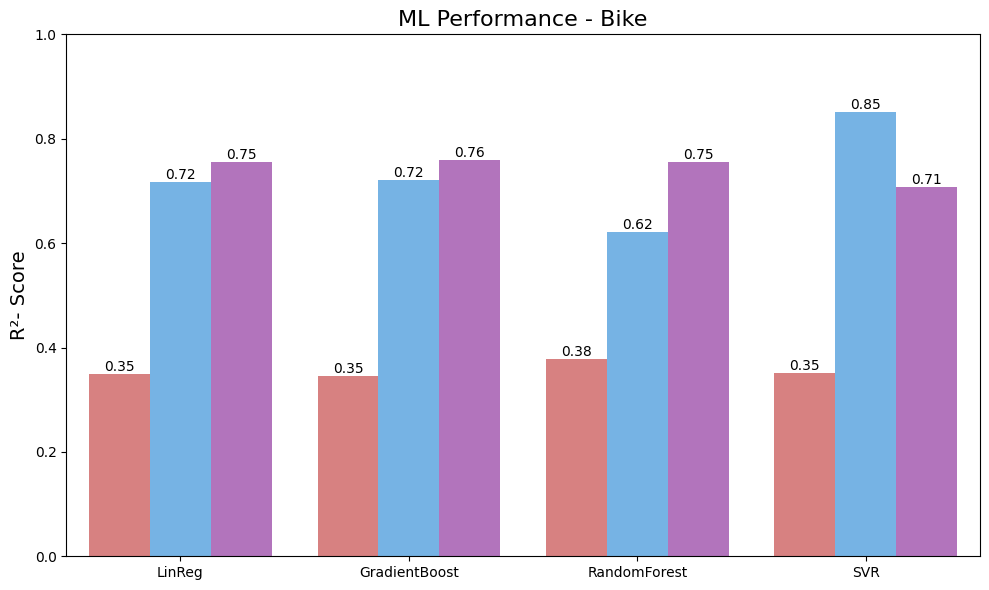

In [6]:
data = {
    'Algorithmus': ['LinReg', 'LinReg', 'LinReg',
                    'GradientBoost', 'GradientBoost', 'GradientBoost',
                    'RandomForest', 'RandomForest', 'RandomForest',
                    'SVR', 'SVR', 'SVR'],
    'Labels': ['Wetter', 'Zeit', 'Wetter + Zeit'] * 4,
    'r2_score': [float(el[2]) for el in result_list_Fahrrad]
}

# DataFrame erstellen
df = pd.DataFrame(data)

custom_palette = {
    'Wetter': '#E57373',         # Muted Red
    'Zeit': '#64B5F6',           # Muted Blue
    'Wetter + Zeit': '#BA68C8'   # Muted Violet
}

# Barplot erstellen
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df, x='Algorithmus', y='r2_score', hue='Labels', palette=custom_palette)

# Titel und Labels
plt.title('ML Performance - Bike', fontsize=16)
plt.xlabel('', fontsize=14)
plt.ylabel('R²- Score', fontsize=14)
plt.legend(title='Labels', fontsize=12)
ax.legend_.remove()
plt.tight_layout()
plt.ylim(0, 1)

for container in ax.containers:
    ax.bar_label(container, labels=[f"{v.get_height():.2f}" for v in container])

# Plot anzeigen
plt.show()

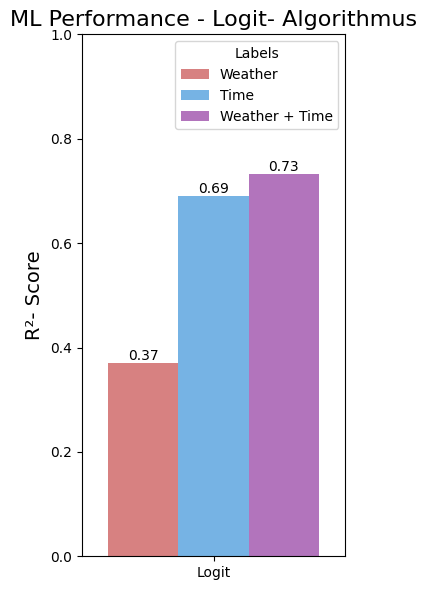

In [7]:
data = {
    'Algorithmus': ['Logit', 'Logit', 'Logit'],
    'Labels': ['Weather', 'Time', 'Weather + Time'],
    'r2_score': [0.37069911441131476, 0.6911987080472226, 0.7321266669271125]
}

# DataFrame erstellen
df = pd.DataFrame(data)

custom_palette = {
    'Weather': '#E57373',         # Muted Red
    'Time': '#64B5F6',           # Muted Blue
    'Weather + Time': '#BA68C8'   # Muted Violet
}

# Barplot erstellen
plt.figure(figsize=(3.5, 6))
ax = sns.barplot(data=df, x='Algorithmus', y='r2_score', hue='Labels', palette=custom_palette)

# Titel und Labels
plt.title('ML Performance - Logit- Algorithmus', fontsize=16)
plt.xlabel('', fontsize=14)
plt.ylabel('R²- Score', fontsize=14)
#ax.legend_.remove()
plt.tight_layout()
plt.ylim(0, 1)

for container in ax.containers:
    ax.bar_label(container, labels=[f"{v.get_height():.2f}" for v in container])

# Plot anzeigen
plt.show()